# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [6]:
from bs4 import BeautifulSoup
import requests

def grab_song_links(artist_page_url):

    url = artist_page_url

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


    #The example from our lecture/reading
    data = [] #Create a storage container

    #Get album divs
    albums = soup.find_all("div", class_="album")
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [7]:
def scrape_lyrics(song_page_url):
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [13]:
songs = grab_song_links("https://www.azlyrics.com/b/brunomars.html")
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = scrape_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [9]:
import pandas as pd
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(Somewhere In Brooklyn, ../lyrics/brunomars/so...",\n\r\nShe was covered in leather and gold\n21 ...
1,"(The Other Side, ../lyrics/brunomars/theothers...",\n\r\nTruth of the matter is I'm complicated\n...
2,"(Count On Me, ../lyrics/brunomars/countonme.ht...",\n\r\nIf you ever find yourself stuck in the m...
3,"(Talking To The Moon, ../lyrics/brunomars/talk...",\n\r\nI know you're somewhere out there\nSomew...
4,"(Talking To The Moon, ../lyrics/brunomars/talk...",\n\r\nI know you're somewhere out there\nSomew...


In [10]:
df['Song_Name'] = df[0].map(lambda x: x[0])
df['Song_URL_SFFX'] = df[0].map(lambda x: x[1])
df['Album_Name'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song_Name,Song_URL_SFFX,Album_Name
0,"(Somewhere In Brooklyn, ../lyrics/brunomars/so...",\n\r\nShe was covered in leather and gold\n21 ...,Somewhere In Brooklyn,../lyrics/brunomars/somewhereinbrooklyn.html,"EP: ""It's Better If You Don't Understand"" (2010)"
1,"(The Other Side, ../lyrics/brunomars/theothers...",\n\r\nTruth of the matter is I'm complicated\n...,The Other Side,../lyrics/brunomars/theotherside.html,"EP: ""It's Better If You Don't Understand"" (2010)"
2,"(Count On Me, ../lyrics/brunomars/countonme.ht...",\n\r\nIf you ever find yourself stuck in the m...,Count On Me,../lyrics/brunomars/countonme.html,"EP: ""It's Better If You Don't Understand"" (2010)"
3,"(Talking To The Moon, ../lyrics/brunomars/talk...",\n\r\nI know you're somewhere out there\nSomew...,Talking To The Moon,../lyrics/brunomars/talkingtothemoon.html,"EP: ""It's Better If You Don't Understand"" (2010)"
4,"(Talking To The Moon, ../lyrics/brunomars/talk...",\n\r\nI know you're somewhere out there\nSomew...,Talking To The Moon,../lyrics/brunomars/talkingtothemoon.html,"EP: ""It's Better If You Don't Understand"" (2010)"


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Top 10 Lyrics for The Other Side')

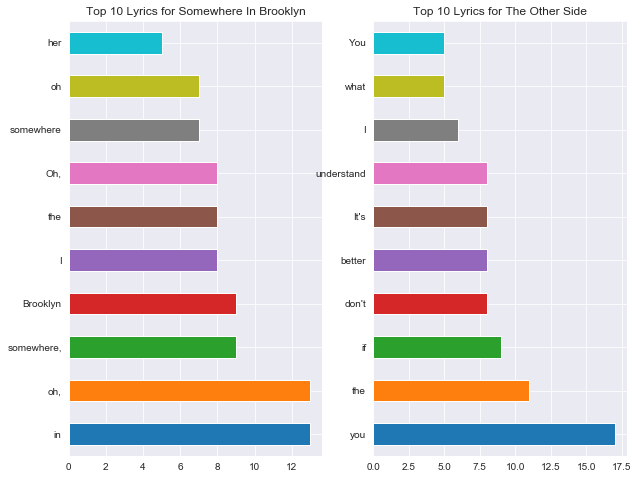

In [12]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[1]))

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!